### Este notebook contém uma análise de algum dos algoritmos mais famosos como, insertion sort, selection sort, bubble sort, quicksort, heapsort, mergesort, tim sort e couting sort.


In [9]:
!pip install tabulate
import time
from tabulate import tabulate
import matplotlib.pyplot as plt

You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


## Funções Auxiliares

In [10]:
def lerArquivo(file):
    dados = []
    f = open(file, 'r')
    for linha in f.readlines():
        valores = linha.replace("\n", "").split("\t")
        for valor in valores:
            dados.append(int(valor))
    f.close()
    return dados


In [11]:
dados_1k = lerArquivo('./entradas/1000.txt')
dados_5k = lerArquivo('./entradas/5000.txt')
dados_10k = lerArquivo('./entradas/10000.txt')
dados_20k = lerArquivo('./entradas/20000.txt')
dados_50k = lerArquivo('./entradas/50000.txt')
dados_75k = lerArquivo('./entradas/75000.txt')
dados_100k = lerArquivo('./entradas/100000.txt')
conjunto_dados = [dados_1k, dados_5k, dados_10k, dados_20k, dados_50k, dados_75k, dados_100k]
print(
    len(dados_1k), 
    len(dados_5k), 
    len(dados_10k),
    len(dados_20k),
    len(dados_50k),
    len(dados_75k),
    len(dados_100k)
)


1000 5000 10000 20000 50000 75000 100000


In [12]:
def calcula_tempo(algoritmo, dado):
    tempo_inicial = time.time()
    algoritmo(dado.copy())
    tempo_final = time.time()
    tempo_decorrido = tempo_final - tempo_inicial
    return tempo_decorrido

def executa_sequencia(algoritmo):
    tempos_de_execucao = []
    for dado in conjunto_dados:
        tempo = calcula_tempo(algoritmo, dado)
        tempos_de_execucao.append(tempo)
    return tempos_de_execucao

## Insertion Sort

O Insertion sort consiste em um algoritmo que constrói uma matriz ordenada, inserindo elemento a elemento já na ordem correta, por isso o nome de `insertion sort`.

O seu **melhor caso** é a ordernação de uma matriz já ordenada, no qual acontece em **O(n)**, uma vez que para cada elemento ele constrói uma nova matriz já com os elementos na posição correta.

Já no seu **pior caso**, que consiste em um array ordenado inversamente, e executa em O(n^2) uma vez que para cada elemento inserido, precisa percorrer a matriz que está a ser inserida por completo para encontrar a posição de inserção. 

Ficando com seu caso médio em O(n^2) assim como seu pior caso, uma vez que em média para cada valor inserido também precisará escanear a matriz contruída.


In [13]:
def insertionSort(dados):
    for indice in range (1, len(dados)):
        chave = dados[indice]
        pivo = indice-1
        while pivo >= 0 and chave < dados[pivo]:
            dados[pivo+1] = dados[pivo]
            pivo -= 1
        dados[pivo+1] = chave
    return dados

## QuickSort

Baseado numa estratégia de dividir e conquistar, o quicksort consiste em:

- Escolher um elemento da lista como pivô
- Particionar a lista, colocando todos os elementos menores que o pivô a esquerda do mesmo, e todos os valores maiores a direita, ao final temos o pivô e sua posição final e duas sublistas não ordenadas
- Recursivamente ordena as duas sublistas

Em seu **melhor caso** acontece quando ao selecionar um pivô, temos duas sublistas balanceadas, onde neste caso temos a relação de recorrência dada por:

> T(n) = 2T(n/2) + O(n)

Ao qual pelo teorema mestre temos:

> T(n) = O(n*log(n))

Já o pior caso consiste em quando selecionamos um pivô, temos uma sublista com 0 elementos e a outra com todos os elementos, e isso pode acontecer por exemplo com uma matriz de entrada já ordernada. 

Neste caso para cada elemento iremos ter que ordernar de maneira por completa a sublista desbalanceada,resultando em uma complexidade de O(n^2)

Já o caso médio, como em média as matrizes de entrada não costumam já estar ordenada fica igual ao do melhor caso, resultando em O(n*log(n))

In [14]:
def particao(arr, menor, maior):
    i = (menor-1)
    pivo = arr[maior]
 
    for j in range(menor, maior):
        if arr[j] <= pivo:
            i = i+1
            arr[i], arr[j] = arr[j], arr[i]
 
    arr[i+1], arr[maior] = arr[maior], arr[i+1]
    return (i+1)

def quickSort(arr, menor, maior):
    if len(arr) == 1:
        return arr
    if menor < maior:
        indice_particao = particao(arr, menor, maior)
        quickSort(arr, menor, indice_particao-1)
        quickSort(arr, indice_particao+1, maior)

#### Função auxiliar para quicksort

In [15]:
def calcula_tempo_quicksort(dado):
    tempo_inicial = time.time()
    quickSort(dado.copy(), 0, len(dado)-1)
    tempo_final = time.time()
    tempo_decorrido = tempo_final - tempo_inicial
    return tempo_decorrido

def executa_sequencia_quicksort():
    tempos_de_execucao = []
    for dado in conjunto_dados:
        tempo = calcula_tempo_quicksort(dado)
        tempos_de_execucao.append(tempo)
    return tempos_de_execucao

## Tim Sort

O Tim sort foi inventado por Tim Peters, sendo um híbrido do MergeSort e do insertionSort, e é o algoritmo de ordenação padrão utilizado pelo python e pelo Java a partir da versão 7.

O Tim Sort tem perfomance muito boa mesmo com arrays parcialmente ordenados, que como vimos anteriormente é o "calo" do QuickSort.

Em seu *melhor caso* que ocorre quando a entrada já está ordenada o TimSort funciona de maneira similar ao insertionSort, tendo sua complexidade de O(n)

Já em seu *pior caso*, o Tim Sort funciona parecido com o MergeSort tendo seu pior caso em O(n*log(n)), ficando com seu caso médio em O(n*log(n))


In [16]:
MIN_MERGE = 32

def calcMinExecucao(n): 
    r = 0
    while n >= MIN_MERGE: 
        r |= n & 1
        n >>= 1
    return n + r 
  
def merge(arr, l, m, r): 
    len1, len2 = m - l + 1, r - m 
    esquerda, direita = [], [] 
    for i in range(0, len1): 
        esquerda.append(arr[l + i]) 
    for i in range(0, len2): 
        direita.append(arr[m + 1 + i]) 
  
    i = 0
    j = 0
    k = l

    while i < len1 and j < len2: 
        if esquerda[i] <= direita[j]: 
            arr[k] = esquerda[i] 
            i += 1
        else: 
            arr[k] = direita[j] 
            j += 1
        k += 1
  
    while i < len1: 
        arr[k] = esquerda[i] 
        k += 1
        i += 1
  
    while j < len2: 
        arr[k] = direita[j] 
        k += 1
        j += 1
  
def insertionSortParcial(arr, esquerda, direita): 
    for i in range(esquerda + 1, direita + 1): 
        j = i 
        while j > esquerda and arr[j] < arr[j - 1]: 
            arr[j], arr[j - 1] = arr[j - 1], arr[j] 
            j -= 1
          
def timSort(arr): 
    n = len(arr) 
    minExecucao = calcMinExecucao(n) 
      
    for inicio in range(0, n, minExecucao): 
        fim = min(inicio + minExecucao - 1, n - 1) 
        insertionSortParcial(arr, inicio, fim) 
  
    size = minExecucao 
    while size < n: 
        for esquerda in range(0, n, 2 * size): 
            meio = min(n - 1, esquerda + size - 1) 
            direita = min((esquerda + 2 * size - 1), (n - 1)) 
            merge(arr, esquerda, meio, direita) 
  
        size = 2 * size 
  

## Couting Sort

Baseado em uma lógica de dicionário, o countsort tem a limitação de funcionar apenas para valores inteiros.

Consiste em utilizar uma lógica de objetos e operações aritimétricas para já colocar cada número em sua respectiva correta posição.

A ideia básica do counting sort é determinar, para cada entrada x, o número de elementos menor que x. Essa informação pode ser usada para colocar o elemento x diretamente em sua posição no array de saída.

O counting sort tem sua complexidade definida, tanto no maior ou melhor caso, definida por O(n+k), onde k é o maior valor da matriz de entrada.


In [17]:
def count_sort(arr): 
    elemento_max = int(max(arr)) 
    elemento_min = int(min(arr)) 
    intervalo_de_elementos = elemento_max - elemento_min + 1
    arr_de_contagem = [0 for _ in range(intervalo_de_elementos)] 
    arr_de_saida = [0 for _ in range(len(arr))] 
  
    for i in range(0, len(arr)): 
        arr_de_contagem[arr[i]-elemento_min] += 1
  
    for i in range(1, len(arr_de_contagem)): 
        arr_de_contagem[i] += arr_de_contagem[i-1] 
  
    for i in range(len(arr)-1, -1, -1): 
        arr_de_saida[arr_de_contagem[arr[i] - elemento_min] - 1] = arr[i] 
        arr_de_contagem[arr[i] - elemento_min] -= 1

    for i in range(0, len(arr)): 
        arr[i] = arr_de_saida[i] 
  
    return arr 

## Comparativo de tempo

In [18]:
tempos_insertion = executa_sequencia(insertionSort)
tempos_quick = executa_sequencia_quicksort()
tempos_tim = executa_sequencia(timSort)
tempos_count = executa_sequencia(count_sort)

In [19]:
dados_tabulados = [["insertionSort"]+tempos_insertion[:3], ["quickSot"]+tempos_quick[:3], ["timSort"]+tempos_tim[:3], ["countSort"]+tempos_count[:3]]
print(tabulate(dados_tabulados, headers=["algoritmo", "1k", "5k", "10k"], tablefmt="github"))


| algoritmo     |          1k |         5k |       10k |
|---------------|-------------|------------|-----------|
| insertionSort | 0.058095    | 1.27141    | 5.276     |
| quickSot      | 0.00254798  | 0.016367   | 0.0324941 |
| timSort       | 0.00486016  | 0.02829    | 0.0635719 |
| countSort     | 0.000864983 | 0.00438285 | 0.0103559 |


In [20]:
dados_tabulados = [["insertionSort"]+tempos_insertion[3:], ["quickSot"]+tempos_quick[3:], ["timSort"]+tempos_tim[3:], ["countSort"]+tempos_count[3:]]
print(tabulate(dados_tabulados, headers=["algoritmo", "20k", "50k", "75k", "100k"], tablefmt="github"))


| algoritmo     |        20k |         50k |         75k |       100k |
|---------------|------------|-------------|-------------|------------|
| insertionSort | 20.8728    | 152.644     | 348.703     | 639.895    |
| quickSot      |  0.075387  |   0.218202  |   0.339609  |   0.425921 |
| timSort       |  0.14152   |   0.416637  |   0.603355  |   0.859973 |
| countSort     |  0.0225849 |   0.0595729 |   0.0936661 |   0.133353 |


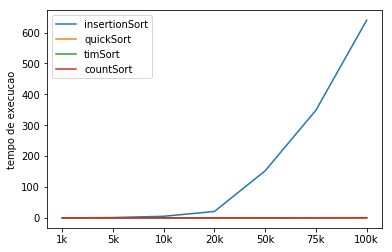

In [21]:
plt.plot(["1k", "5k", "10k", "20k", "50k", "75k", "100k"],tempos_insertion, label='insertionSort')
plt.plot(tempos_quick, label='quickSort')
plt.plot(tempos_tim, label='timSort')
plt.plot(tempos_count, label='countSort')
plt.ylabel('tempo de execucao')
plt.legend()
plt.show()

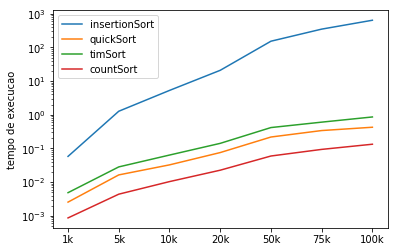

In [22]:
plt.plot(["1k", "5k", "10k", "20k", "50k", "75k", "100k"],tempos_insertion, label='insertionSort')
plt.plot(tempos_quick, label='quickSort')
plt.plot(tempos_tim, label='timSort')
plt.plot(tempos_count, label='countSort')
plt.ylabel('tempo de execucao')
plt.legend()
plt.yscale("log")
plt.show()

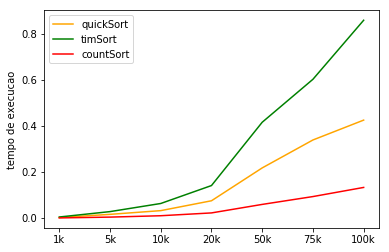

In [23]:
plt.plot(["1k", "5k", "10k", "20k", "50k", "75k", "100k"],tempos_quick, label='quickSort', color="orange")
plt.plot(tempos_tim, label='timSort', color="green")
plt.plot(tempos_count, label='countSort', color="red")
plt.ylabel('tempo de execucao')
plt.legend()
plt.show()

## Execuções de melhores e piores casos

In [56]:
dados_10k_ordenados = dados_10k.copy()
timSort(dados_10k_ordenados)
dados_10k_inverso = dados_10k_ordenados.copy()
dados_10k_inverso.reverse()


## Melhores casos

In [57]:
melhor_caso_insertion = calcula_tempo(insertionSort, dados_10k_ordenados)
melhor_caso_quick = calcula_tempo_quicksort(dados_10k)
melhor_caso_tim = calcula_tempo(timSort, dados_10k_ordenados)
print(melhor_caso_insertion, melhor_caso_quick, melhor_caso_tim)

0.0029439926147460938 0.034330129623413086 0.03840994834899902


In [54]:
sys.setrecursionlimit(10100)
pior_caso_insertion = calcula_tempo(insertionSort, dados_10k_inverso)
pior_caso_quick = calcula_tempo_quicksort(dados_10k_ordenados)
pior_caso_tim = calcula_tempo(timSort, dados_10k_inverso)

In [55]:
print(pior_caso_insertion, pior_caso_quick, pior_caso_tim)

10.685004949569702 12.217001914978027 0.07252907752990723


In [58]:
print(tabulate([["insertion", melhor_caso_insertion, pior_caso_insertion], ["quick", melhor_caso_quick, pior_caso_quick], ["tim", melhor_caso_tim, pior_caso_tim]], headers=["algoritmo", "melhor caso", "pior caso"], tablefmt="github"))

| algoritmo   |   melhor caso |   pior caso |
|-------------|---------------|-------------|
| insertion   |    0.00294399 |  10.685     |
| quick       |    0.0343301  |  12.217     |
| tim         |    0.0384099  |   0.0725291 |
